### Automated testing

In [1]:
import pandas as pd
import nltk
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from bert_score import BERTScorer

# Replace 'Data cleaning/medicalQnA.xlsx' with the path to your Excel file
excel_file_path = '../Data cleaning/medicalQnA.xlsx'

# Read the Excel file into a DataFrame
df = pd.read_excel(excel_file_path)

In [2]:
df

,answer,question,url,tags
0,adhd and bipolar mood disorder (bmd) can coexi...,my 5 1/2-year-old son displays adhd symptoms f...,http://answers.webmd.com/answers/1194205/my-5-...,['attention deficit hyperactivity disorder']
1,stimulants in general tend to decrease appetit...,my son has add and mild autism. he has been su...,http://answers.webmd.com/answers/1194206/my-so...,"['autism', 'weight loss']"
2,while any of the stimulant medications can inc...,my son is 13 and is depressed. he has been tak...,http://answers.webmd.com/answers/1198557/my-so...,[]
3,seventy percent of teens diagnosed when they a...,my 17-year-old has stopped taking concerta aft...,http://answers.webmd.com/answers/1195455/my-17...,['attention deficit hyperactivity disorder']
4,try claritin-d which is located behind the pha...,i've been taking respa-ar for allergies. i can...,http://answers.webmd.com/answers/1182576/i-ve-...,['allergy']
...,...,...,...,...
29747,get it confirmed by doing venous doppler of bo...,pain in legs – varicose veins?,https://questiondoctors.com/question-pain-in-l...,[]
29748,hi dear. there are very less chances of pregna...,headaches really tired all the time feeling na...,https://questiondoctors.com/question-headaches...,"[""don't know if its too early to take a pregna..."
29749,i’m a radiologist. may be an mri misread. when...,46 year old male had stroke on right side of b...,https://questiondoctors.com/question-46-year-o...,['stroke on right side of brain']
29750,could be reaction to oxycodone…. ”the most fre...,46 year old male had stroke on right side of b...,https://questiondoctors.com/question-46-year-o...,['stroke on right side of brain']


In [10]:
# Replace 'your_file.txt' with the actual file path
file_path = 'random10.txt'

# Initialize an empty dictionary to store the data
qa_dict = {}

# Open and read the file
with open(file_path, 'r') as file:
    lines = file.readlines()
    current_question = None
    current_answer = None

    for line in lines:
        line = line.strip()  # Remove leading/trailing white spaces

        if line.startswith('question:'):
            if current_question:
                qa_dict[current_question] = current_answer
            current_question = line[len('question: '):]  # Extract the question text
            current_answer = None  # Reset the current answer
        elif line.startswith('answer:'):
            if current_answer:
                current_answer += " " + line[len('answer: '):]  # Append to the current answer
            else:
                current_answer = line[len('answer: '):]  # Extract the answer text

    # Add the last question and answer to the dictionary
    if current_question:
        qa_dict[current_question] = current_answer

# Print the dictionary
for question, answer in qa_dict.items():
    print(f"Question: {question}")
    print(f"Answer: {answer}")
    print()

Question: have insurance companies stopped paying for b12 shots if you are not enimic
Answer: yes insurance company stopped paying

Question: is it safe to take oral contraceptive pill?
Answer: yes oral contraceptive pill safe

Question: can a mammogram detect whether a lump found in the breast of a male is fat cells or a tumor? . a male friend of mine has been advised to have a mammogram even though a biopsy already ruled out cancer in a lump he found in his breast. the doctor indicates he is not certain if it is fat cells or a tumor. can a mammogram detect this? and why would they not already know this information from having performed a biopsy?
Answer: hi really way tell whats going without knowing detail would best go see doctor get checked

Question: why is my cervical mucus not changing? does this mean i am now infertile if it used to?
Answer: hi yes need get checked doctor may something serious like cervical cancer get checked doctor may something serious like cervical

Question

In [12]:
# Initialize the BERTScorer
scorer = BERTScorer(lang="en")  # "en" for English, you can use other languages as well

# Create a smoothing function (e.g., Laplace smoothing)
smoother = SmoothingFunction()

# Initialize variables to keep track of BERTScore, BLEU score, and Exact Match
bertScore = 0
bleuScore = 0

for question in qa_dict:
    generated_text = qa_dict[question]
    reference_text = df[df["question"] == question]["answer"].values[0]
                        
    # Calculate BERTScore
    precision, recall, f1 = scorer.score([generated_text], [reference_text])

    # Print the BERTScore values
    print(f"BERTScore: {f1.item():.4f}")
    
    # Calculate BLEU Score
    generated_tokens = generated_text.split()
    reference_tokens = reference_text.split()
    bleu = sentence_bleu([reference_tokens], generated_tokens, smoothing_function=smoother.method1)

    # Print the BLEU Score
    print(f"BLEU Score: {bleu:.4f}")

    bertScore += f1.item()
    bleuScore += bleu

print("Average BERTScore:", bertScore / 9)  # Calculate and print average BERTScore
print("Average BLEU Score:", bleuScore / 9)  # Calculate and print average BLEU Score

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BERTScore: 0.8375
BLEU Score: 0.0000
BERTScore: 0.8362
BLEU Score: 0.0000
BERTScore: 0.8429
BLEU Score: 0.0101
BERTScore: 0.8024
BLEU Score: 0.0096
BERTScore: 0.8230
BLEU Score: 0.0001
BERTScore: 0.8146
BLEU Score: 0.0012
BERTScore: 0.8036
BLEU Score: 0.0037
BERTScore: 0.8323
BLEU Score: 0.0047
BERTScore: 0.7760
BLEU Score: 0.0004
Average BERTScore: 0.8187290827433268
Average BLEU Score: 0.0033010229481435713


### Human evaluation

In [1]:
import pandas as pd

# Specify the Excel file path
excel_file_path = "human_evaluation.xlsx"

# Read each sheet into separate DataFrames
eval_df_A = pd.read_excel(excel_file_path, sheet_name="A")
eval_df_B = pd.read_excel(excel_file_path, sheet_name="B")
eval_df_C = pd.read_excel(excel_file_path, sheet_name="C")
eval_df_D = pd.read_excel(excel_file_path, sheet_name="D")

In [12]:
data = {
    'correctness': [eval_df_A[eval_df_A["Question"]=="average"].values[0][1],
                    eval_df_B[eval_df_B["Question"]=="average"].values[0][1],
                    eval_df_C[eval_df_C["Question"]=="average"].values[0][1], 
                    eval_df_D[eval_df_D["Question"]=="average"].values[0][1]],
    'coherence': [eval_df_A[eval_df_A["Question"]=="average"].values[0][2],
                    eval_df_B[eval_df_B["Question"]=="average"].values[0][2],
                    eval_df_C[eval_df_C["Question"]=="average"].values[0][2], 
                    eval_df_D[eval_df_D["Question"]=="average"].values[0][2]],
    'fluency': [eval_df_A[eval_df_A["Question"]=="average"].values[0][3],
                    eval_df_B[eval_df_B["Question"]=="average"].values[0][3],
                    eval_df_C[eval_df_C["Question"]=="average"].values[0][3], 
                    eval_df_D[eval_df_D["Question"]=="average"].values[0][3]]
}

# Create a DataFrame from the dictionary
eval_df = pd.DataFrame(data)

eval_df

,correctness,coherence,fluency
0,7.000000,3.000000,2.888889
1,6.777778,3.333333,2.666667
2,7.555556,4.111111,3.777778
3,7.000000,4.333333,2.888889


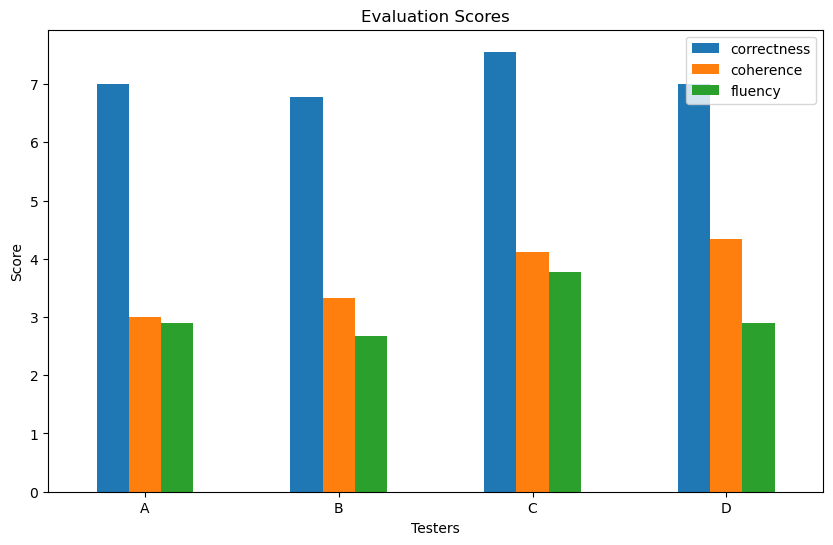

In [17]:
import matplotlib.pyplot as plt

# Plot the data
ax = eval_df.plot(kind='bar', figsize=(10, 6), rot=0)
plt.title('Evaluation Scores')
plt.xlabel('Testers')
plt.ylabel('Score')
# Set custom x-axis labels
ax.set_xticklabels(['A', 'B', 'C', 'D'])
plt.legend(loc='upper right')
plt.show()

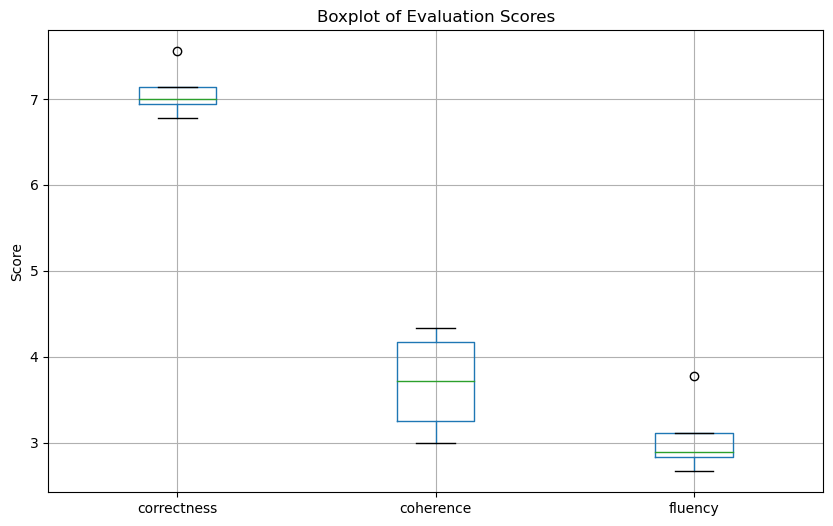

In [20]:
# Plot boxplot
plt.figure(figsize=(10, 6))
eval_df.boxplot()
plt.title('Boxplot of Evaluation Scores')
plt.ylabel('Score')
plt.show()

In [18]:
import pandas as pd
import numpy as np

# Assuming you have already created the eval_df DataFrame

# Calculate mean
mean_values = eval_df.mean()
print("Mean:\n", mean_values)

# Calculate median
median_values = eval_df.median()
print("\nMedian:\n", median_values)

# Calculate mode
mode_values = eval_df.mode().iloc[0]
print("\nMode:\n", mode_values)

# Calculate standard deviation
std_deviation_values = eval_df.std()
print("\nStandard Deviation:\n", std_deviation_values)

# Calculate range
range_values = eval_df.apply(lambda x: np.ptp(x))
print("\nRange:\n", range_values)


Mean:
 correctness    7.083333
coherence      3.694444
fluency        3.055556
dtype: float64

Median:
 correctness    7.000000
coherence      3.722222
fluency        2.888889
dtype: float64

Mode:
 correctness    7.000000
coherence      3.000000
fluency        2.888889
Name: 0, dtype: float64

Standard Deviation:
 correctness    0.331787
coherence      0.630990
fluency        0.492746
dtype: float64

Range:
 correctness    0.777778
coherence      1.333333
fluency        1.111111
dtype: float64
